In [50]:
# load library
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [51]:
# load data
# df = pd.read_csv('./data/sebaran-hotspot-agustus.csv')
# df = pd.read_csv('./data/sebaran-hotspot.csv')
df = pd.read_csv('./data/sebaran-hotspot-4.csv')
df.head()

provinsi    kabupaten   kecamatan             desa   tanggal  \
0  Kalimantan Barat  KAPUAS HULU       BADAU            BADAU  1/9/2019   
1  Kalimantan Barat    KUBU RAYA  BATU AMPAR  TANJUNG HARAPAN  1/9/2019   
2  Kalimantan Barat    KUBU RAYA  BATU AMPAR  TANJUNG HARAPAN  1/9/2019   
3  Kalimantan Barat    KUBU RAYA  BATU AMPAR  TANJUNG HARAPAN  1/9/2019   
4  Kalimantan Barat  KAPUAS HULU    EMPANANG     NANGA KANTUK  1/9/2019   

    waktu     satelit confidence  latitude   longitude  
0  06:17   TERRA/AQUA     Medium  1.024302  111.886742  
1  06:20   NASA-MODIS     Medium -0.896000  109.686000  
2  06:17   TERRA/AQUA     Medium -0.896321  109.685867  
3  06:16   TERRA/AQUA     Medium -0.896321  109.685867  
4  06:17   TERRA/AQUA     Medium  0.812014  111.762520

In [52]:
df.shape

(22053, 10)

In [53]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(df[['latitude','longitude']])
df_scale = pd.DataFrame(scale, columns = ['latitude','longitude']);
df_scale.head(5)

latitude  longitude
0  0.807964   0.624560
1  0.422908   0.170143
2  0.422844   0.170115
3  0.422844   0.170115
4  0.765396   0.598910

In [54]:
km=KMeans(n_clusters=7)
y_predicted = km.fit_predict(df[['latitude','longitude']])
y_predicted

array([5, 2, 2, ..., 0, 0, 0], dtype=int32)

In [55]:
km.cluster_centers_


array([[-1.77776065e+00,  1.10210953e+02],
       [-5.83214007e-02,  1.12484131e+02],
       [-8.75135928e-01,  1.09763495e+02],
       [-2.67395377e+00,  1.10629102e+02],
       [ 8.15208248e-01,  1.09410256e+02],
       [ 2.84190969e-01,  1.11284120e+02],
       [-7.21004779e-01,  1.10781391e+02]])

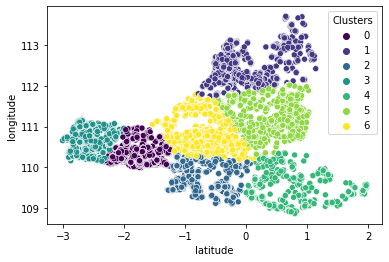

In [56]:
df['Clusters'] = km.labels_
sns.scatterplot(x="latitude", y="longitude",hue = 'Clusters',  data=df,palette='viridis')
plt.savefig("test_cluster.png", dpi=500)

In [59]:
K=range(1,12)
wss = []

for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(df_scale)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

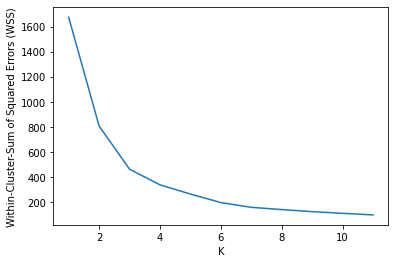

In [60]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)
plt.savefig("test_elbow.png", dpi=500)

In [45]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(df_scale).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
    +str(metrics.silhouette_score(df_scale,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.5420468345023364
Silhouette score for k(clusters) = 3 is 0.51024797559696
Silhouette score for k(clusters) = 4 is 0.4554201774930825
Silhouette score for k(clusters) = 5 is 0.44690110938975675
Silhouette score for k(clusters) = 6 is 0.49287000318117236
Silhouette score for k(clusters) = 7 is 0.5123274242379572
Silhouette score for k(clusters) = 8 is 0.49745056410914706
Silhouette score for k(clusters) = 9 is 0.4348592243622602
Silhouette score for k(clusters) = 10 is 0.4492906176539242
Silhouette score for k(clusters) = 11 is 0.4511478523293423
Silhouette score for k(clusters) = 12 is 0.4638506252849788
